In [63]:
import pandas as pd

In [64]:
# normalizar dados

dados = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv", sep=',')

In [65]:
dados_num = dados.drop(columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"])
dados_categoricos = dados[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]]

# normalizar os categoricos

dados_categoricos_normalizados = pd.get_dummies(data=dados_categoricos, prefix='', prefix_sep='')
print(dados_categoricos_normalizados)

      Female   Male     no    yes     no    yes  Always  Frequently  \
0       True  False  False   True   True  False   False       False   
1       True  False  False   True   True  False   False       False   
2      False   True  False   True   True  False   False       False   
3      False   True   True  False   True  False   False       False   
4      False   True   True  False   True  False   False       False   
...      ...    ...    ...    ...    ...    ...     ...         ...   
2106    True  False  False   True  False   True   False       False   
2107    True  False  False   True  False   True   False       False   
2108    True  False  False   True  False   True   False       False   
2109    True  False  False   True  False   True   False       False   
2110    True  False  False   True  False   True   False       False   

      Sometimes     no  ...  Motorbike  Public_Transportation  Walking  \
0          True  False  ...      False                   True    False   

In [66]:
# treinar modelo normalizador dos dados num

from sklearn import preprocessing
normalizador = preprocessing.MinMaxScaler()
modelo_normalizador = normalizador.fit(dados_num)
from pickle import dump
dump(modelo_normalizador, open("normalizador1.pkl", "wb"))

In [67]:
# normalizar a base de dados de entrada
dados_num_normalizados = modelo_normalizador.fit_transform(dados_num)
print(dados_num_normalizados)

# cria um dataframe com os dados normalizados (categóricos e numéricos)
# converte os dados numéricos normalizados em dataframe
dados_num_normalizados = pd.DataFrame(data = dados_num_normalizados, columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])
print(dados_num_normalizados)

# junta com os dados categóricos normalizados
dados_normalizados_final = dados_num_normalizados.join(dados_categoricos_normalizados, how = 'left')
print(dados_normalizados_final.head(10))

[[0.14893617 0.32075472 0.18656716 ... 0.5        0.         0.5       ]
 [0.14893617 0.13207547 0.12686567 ... 1.         1.         0.        ]
 [0.19148936 0.66037736 0.28358209 ... 0.5        0.66666667 0.5       ]
 ...
 [0.18136247 0.5702     0.70663696 ... 0.5270965  0.471403   0.323144  ]
 [0.22046672 0.54613208 0.70407941 ... 0.9261695  0.37970233 0.2930175 ]
 [0.20563211 0.54497358 0.70501971 ... 0.9317565  0.34215067 0.3570685 ]]
           Age    Height    Weight  FCVC       NCP      CH2O       FAF  \
0     0.148936  0.320755  0.186567   0.5  0.666667  0.500000  0.000000   
1     0.148936  0.132075  0.126866   1.0  0.666667  1.000000  1.000000   
2     0.191489  0.660377  0.283582   0.5  0.666667  0.500000  0.666667   
3     0.276596  0.660377  0.358209   1.0  0.666667  0.500000  0.666667   
4     0.170213  0.622642  0.379104   0.5  0.000000  0.500000  0.000000   
...        ...       ...       ...   ...       ...       ...       ...   
2106  0.148443  0.491943  0.689616   1

In [68]:
# usa a distorção para determinar o num ótimo de grupos
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import math
import numpy as np

distortions = []
K = range(1, 251)
# trienar iteritivamente até n_clusters = K[i]
for i in K:
    kmeans_model = KMeans(n_clusters=i, random_state=42).fit(dados_normalizados_final)
     # seleciona apenas as colunas dos dados numéricos
    centroids = kmeans_model.cluster_centers_[:, :dados_num_normalizados.shape[1]]
    distortions.append(sum(np.min(cdist(dados_num_normalizados, centroids, 'euclidean'), axis=1) / dados_num_normalizados.shape[0]))

print(distortions)

[0.680432584547735, 0.6483118808723356, 0.63255607608809, 0.6185306394442214, 0.607544093297178, 0.5986775294405002, 0.5883447620523434, 0.5801852090520478, 0.5772522858026822, 0.5717765785538222, 0.5648159500661031, 0.5575890998955514, 0.5526045094776053, 0.5405057795896758, 0.5317333232264195, 0.5252719604770866, 0.5223084630981804, 0.5158538447555912, 0.510004827163033, 0.5070025107019709, 0.4936545265852005, 0.4904542727030025, 0.48519216715129865, 0.4838376124509876, 0.4823298674065537, 0.47992578513999323, 0.4798721209071181, 0.4785617141429423, 0.4781810424181851, 0.47712689058418367, 0.4681515850747367, 0.44808628685046775, 0.44183766595023927, 0.43688097401634435, 0.43683898139985505, 0.4352266589413199, 0.4354468333170044, 0.43231880354411595, 0.42945627858784996, 0.42886359289485376, 0.4265791959478006, 0.4254564390099522, 0.4214121275415107, 0.41971501516285104, 0.41946946830895193, 0.4168553608107399, 0.4138029464633269, 0.4164302624108185, 0.4156210988224919, 0.4132411331

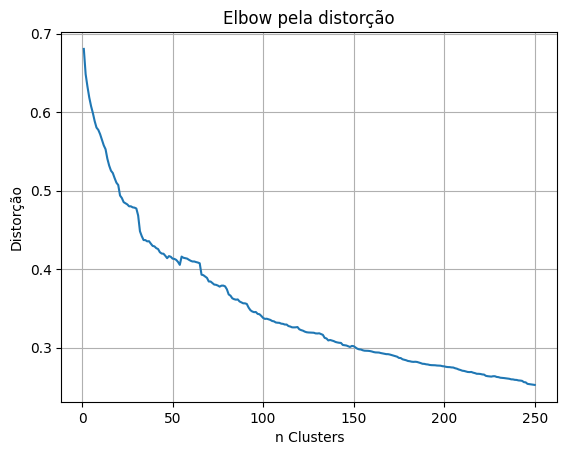

In [69]:
# exibir o gráfico das distorções
fig, ax = plt.subplots()
ax.plot(K, distortions)
ax.set(xlabel = 'n Clusters', ylabel = 'Distorção', title = 'Elbow pela distorção')
ax.grid()
fig.savefig('elbow_distorcao.png')
plt.show()

In [70]:
# calcula o num ótimo de clusters
x0 = K[0]
y0 = distortions[0]
xn = K[len(K)-1]
yn = distortions[len(distortions)-1]
# itera nos pontos gerados durante os treinamentos preliminares
distancias = []
for i in range (len(distortions)):
    x = K[i]
    y = distortions[i]
    numerador = abs((yn-y0)*x - (xn-x0)*y + xn*y0 - yn*x0)
    denominador = math.sqrt((yn-y0)**2 + (xn-x0)**2)
    distancias.append(numerador/denominador)

# maior distancia
n_cluster_otimo = K[distancias.index(np.max(distancias))]

# treina o modelo definitivo
kmeans_model = KMeans(n_clusters = n_cluster_otimo, random_state=42).fit(dados_normalizados_final)
print(kmeans_model.cluster_centers_)
# salva o modelo
dump(kmeans_model, open('clusters.pkl', 'wb'))

[[ 1.04555815e-01  5.22570407e-01  1.91984995e-01 ...  0.00000000e+00
   1.05263158e-01  1.57894737e-01]
 [ 2.50325125e-01  3.54444077e-01  5.30623890e-01 ...  1.00000000e+00
  -1.38777878e-16 -1.38777878e-16]
 [ 4.59547149e-01  5.79390723e-01  3.60854676e-01 ...  2.77555756e-17
  -5.55111512e-17  1.00000000e+00]
 ...
 [ 1.50737839e-01  5.28683407e-01  2.94121169e-01 ...  0.00000000e+00
   8.82352941e-02  6.76470588e-01]
 [ 2.07446809e-01  3.46698113e-01  1.48320896e-01 ...  2.77555756e-17
   6.25000000e-02  0.00000000e+00]
 [ 2.10758339e-01  2.95958569e-01  2.26158400e-01 ...  0.00000000e+00
   4.16666667e-02  6.25000000e-01]]


In [71]:
# declaração de uma nova instância
dados_nova_instancia = {
    'Age': 30,
    'Height': 1.70,
    'Weight': 75,
    'FCVC': 3,
    'NCP': 3,
    'CH2O': 2,
    'FAF': 1,
    'TUE': 1,
    'Gender': 'Male',
    'family_history_with_overweight': 'yes',
    'FAVC': 'yes',
    'CAEC': 'Sometimes',
    'SMOKE': 'no',
    'SCC': 'no',
    'CALC': 'no',
    'MTRANS': 'Public_Transportation',
    'NObeyesdad': 'Obesity_Type_I'
}

# organiza os valores em uma estrutura de dados que corresponde a estrutura das colunas
nova_instancia_df = pd.DataFrame([dados_nova_instancia])

In [72]:
from pickle import load

# carrega o normalizador treinado anteriormente
normalizador_salvo = load(open("normalizador1.pkl", "rb"))

# normaliza os dados numéricos da nova instância usando o normalizador salvo
dados_num_nova_instancia = nova_instancia_df.drop(columns=["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"])
dados_num_nova_instancia_normalizados = normalizador_salvo.transform(dados_num_nova_instancia)

# ajusta as colunas categóricas da nova instância para corresponder a representação dos dados originais
nova_instancia_ajustada = pd.DataFrame(columns=dados_categoricos_normalizados.columns)
for coluna in dados_categoricos_normalizados.columns:
    if coluna in dados_categoricos.columns:
        # se a coluna estiver presente na nova instância se usa o valor correspondente
        nova_instancia_ajustada[coluna] = nova_instancia_df[coluna]
    else:
        # se a coluna não estiver presente na nova instância preenche com 0
        nova_instancia_ajustada[coluna] = 0

# preencher com 1 os valores correspondentes as categorias presentes na nova instância
for coluna in nova_instancia_df.columns:
    if coluna not in dados_categoricos.columns:
        continue
    categoria = nova_instancia_df[coluna][0]
    nova_instancia_ajustada.loc[0, categoria] = 1

# combina os dados numéricos normalizados com os dados categóricos ajustados
nova_instancia_normalizada = pd.concat([pd.DataFrame(dados_num_nova_instancia_normalizados, columns=dados_num_normalizados.columns), nova_instancia_ajustada], axis=1)
nova_instancia_normalizada.fillna(0, inplace=True)

print(nova_instancia_normalizada)

        Age    Height    Weight  FCVC       NCP  CH2O       FAF  TUE  Female  \
0  0.340426  0.471698  0.268657   1.0  0.666667   0.5  0.333333  0.5     0.0   

   Male  ...  Motorbike  Public_Transportation  Walking  Insufficient_Weight  \
0   1.0  ...        0.0                    1.0      0.0                  0.0   

   Normal_Weight  Obesity_Type_I  Obesity_Type_II  Obesity_Type_III  \
0            0.0             1.0              0.0               0.0   

   Overweight_Level_I  Overweight_Level_II  
0                 0.0                  0.0  

[1 rows x 38 columns]


In [73]:
# determina o cluster ao qual a nova instância pertence

# carrega o modelo treinado anteriormente
modelo_kmeans = load(open("clusters.pkl", "rb"))

# usa o modelo treinado para prever o cluster ao qual a nova instância pertence
cluster_predito = modelo_kmeans.predict(nova_instancia_normalizada)

print("A nova instância pertence ao cluster:", cluster_predito)

A nova instância pertence ao cluster: [16]


In [74]:
# obtem os centroids dos clusters
centroides = modelo_kmeans.cluster_centers_

# calcula as distancias entre a nova instancia e os centroides
distancias_para_centroides = [np.linalg.norm(nova_instancia_normalizada - centroide) for centroide in centroides]

# encontra o índice do centroide mais próximo que é o cluster mais próximo
indice_cluster_mais_proximo = np.argmin(distancias_para_centroides)

# imprime informações sobre o cluster atribuido
print("A nova instancia foi atribuida ao cluster", indice_cluster_mais_proximo)
print("Caracteristicas ao cluster:")
print("Centroide", centroides[indice_cluster_mais_proximo])

A nova instancia foi atribuida ao cluster 16
Caracteristicas ao cluster:
Centroide [ 1.75466347e-01  6.98103005e-01  5.16140228e-01  6.50958898e-01
  6.11035247e-01  6.64234611e-01  2.83947728e-01  4.04256204e-01
 -1.66533454e-16  1.00000000e+00  1.11022302e-16  1.00000000e+00
  8.32667268e-17  1.00000000e+00  3.70370370e-02  1.85185185e-02
  9.44444444e-01  3.46944695e-18  9.81481481e-01  1.85185185e-02
  1.00000000e+00 -6.93889390e-18 -2.16840434e-19 -6.93889390e-18
  1.00000000e+00  5.55111512e-17 -1.38777878e-16  1.73472348e-18
  1.73472348e-18  1.00000000e+00  1.38777878e-17  1.38777878e-16
  2.77555756e-17  1.00000000e+00 -5.55111512e-17 -5.55111512e-17
 -8.32667268e-17 -8.32667268e-17]
